In [1]:
# Include
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as skl
import scipy as sc

In [2]:
# Read in the data
df = pd.read_csv('/Users/tmc/Desktop/MS_SMU_Admin/03_2023_Fall/00_Working_DataMiningNotebooks/00_ML_1_Assignments/Project1/WaterQualityAnalysisML/OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
import warnings
warnings.filterwarnings('ignore')

# I didnt like how url is listed in the dataframe so i used chatgpt to take the url column and chop it up 

# deleting mashable from the beginning of the url and create a new column called url_name
df['url_name'] = df['url'].str.replace('http://mashable.com/', '')
df.head()
df['url_name'].value_counts()

# Remove the date part at the beginning of each row in 'url_name' column
df['url_name'] = df['url_name'].str.replace(r'^\d+/\d+/\d+/', '')
# Display the updated DataFrame
df.head()

# Extract the date part from the 'URL' column using regular expressions
df['date'] = df['url'].str.extract(r'(\d{4}/\d{2}/\d{2})')

# Display the 'date' column
# print(df['date'])
df.head()
other_columns = [col for col in df.columns if col not in ['url_name', 'date']]
# Specify the desired column order
column_order = ['url_name', 'date'] + other_columns
# Reorder the columns in the DataFrame
df = df[column_order]

#whitespace issue fix 
# for column in df.columns:
#     if df[column].dtype == 'object':  # Only process object (string) columns
#         df[column] = df[column].str.strip()
# # additional whitespace on other columns 
df.columns.str.strip()

# Display the DataFrame with 'url_name' and 'date' first
df.head()
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Now, when you use df.head(), it will display all columns
df.head()

df_sunday = df[df[' weekday_is_sunday'] == 1]
print(df_sunday.head())

                           url_name        date  \
331                   aaron-swartz/  2013/01/13   
332  bill-clinton-at-golden-globes/  2013/01/13   
333       brickstagram-lego-tumblr/  2013/01/13   
334          effective-resume-tips/  2013/01/13   
335                 epic-ascii-art/  2013/01/13   

                                                   url   timedelta  \
331       http://mashable.com/2013/01/13/aaron-swartz/       725.0   
332  http://mashable.com/2013/01/13/bill-clinton-at...       725.0   
333  http://mashable.com/2013/01/13/brickstagram-le...       725.0   
334  http://mashable.com/2013/01/13/effective-resum...       725.0   
335     http://mashable.com/2013/01/13/epic-ascii-art/       725.0   

      n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
331             10.0              996.0          0.490375                1.0   
332             10.0              331.0          0.691318                1.0   
333             10.0            

In [4]:
# check for any missing data
df.isna().sum()

url_name                         0
date                             0
url                              0
 timedelta                       0
 n_tokens_title                  0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 63, dtype: int64

In [5]:
# Look at the variables
print(df.info())
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url_name                        39644 non-null  object 
 1   date                            39644 non-null  object 
 2   url                             39644 non-null  object 
 3    timedelta                      39644 non-null  float64
 4    n_tokens_title                 39644 non-null  float64
 5    n_tokens_content               39644 non-null  float64
 6    n_unique_tokens                39644 non-null  float64
 7    n_non_stop_words               39644 non-null  float64
 8    n_non_stop_unique_tokens       39644 non-null  float64
 9    num_hrefs                      39644 non-null  float64
 10   num_self_hrefs                 39644 non-null  float64
 11   num_imgs                       39644 non-null  float64
 12   num_videos                     

Index(['url_name', 'date', 'url', ' timedelta', ' n_tokens_title',
       ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
       ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjecti

In [6]:
#Lets change the column date into the proper format datetime and re-order the dataframe in ascending order
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Now, the 'date' column is in datetime format and sortable
# You can change the data type to 'object' if needed
df['date'] = df['date'].dt.strftime('%Y/%m/%d')

# Sort the DataFrame in ascending order based on the 'date' column
df = df.sort_values(by='date', ascending=True)

# Display the sorted DataFrame
df.head()



,url_name,date,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,amazon-instant-video-browser/,2013/01/07,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593
57,reeddit-reddit/,2013/01/07,http://mashable.com/2013/01/07/reeddit-reddit/,731.0,8.0,130.0,0.821705,1.0,0.922078,7.0,4.0,0.0,0.0,4.546154,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300.0,1300.0,1300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300
56,rage-comics-dying/,2013/01/07,http://mashable.com/2013/01/07/rage-comics-dying/,731.0,9.0,474.0,0.608602,1.0,0.802158,11.0,0.0,1.0,0.0,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100
55,power-matters-alliance-organization/,2013/01/07,http://mashable.com/2013/01/07/power-matters-a...,731.0,10.0,555.0,0.535390,1.0,0.708824,7.0,6.0,1.0,0.0,5.147748,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,1900.0,1900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600
54,polaroid-android-camera/,2013/01/07,http://mashable.com/2013/01/07/polaroid-androi...,731.0,9.0,1115.0,0.424132,1.0,0.564539,21.0,21.0,20.0,0.0,4.631390,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3428.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400


In [7]:
# Change the data type of the columns to 'object'
df[' weekday_is_monday']=df[' weekday_is_monday'].astype('category')
df[' weekday_is_tuesday']=df[' weekday_is_tuesday'].astype('category')
df[' weekday_is_wednesday']=df[' weekday_is_wednesday'].astype('category')
df[' weekday_is_thursday']=df[' weekday_is_thursday'].astype('category')
df[' weekday_is_friday']=df[' weekday_is_friday'].astype('category')
df[' weekday_is_saturday']=df[' weekday_is_saturday'].astype('category')
df[' weekday_is_sunday']=df[' weekday_is_sunday'].astype('category')

columns_to_convert = [
    ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
    ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday']

for column in columns_to_convert:
    df[column] = df[column].astype('category')
    
# # Define a function to map values to day of the week
def map_to_day(row):
    if row[' weekday_is_monday'] == 1:
        return 'Monday'
    elif row[' weekday_is_tuesday'] == 1:
        return 'Tuesday'
    elif row[' weekday_is_wednesday'] == 1:
        return ' Wednesday'
    elif row[' weekday_is_thursday'] == 1:
        return ' Thursday'
    elif row[' weekday_is_friday'] == 1:
        return 'Friday'
    elif row[' weekday_is_saturday'] == 1:
        return 'Saturday'
    elif row[' weekday_is_sunday'] == 1:
        return 'Sunday'
    else:
        return None
    return None  # Return None for rows with no day selected

# Apply the function to each row and create a new column 'day'
df['day_of_week'] = df.apply(map_to_day, axis=1)

df.head()

print(df)


                                   url_name        date  \
0             amazon-instant-video-browser/  2013/01/07   
57                          reeddit-reddit/  2013/01/07   
56                       rage-comics-dying/  2013/01/07   
55     power-matters-alliance-organization/  2013/01/07   
54                 polaroid-android-camera/  2013/01/07   
...                                     ...         ...   
39626                  christmas-tree-bugs/  2014/12/27   
39625        als-ice-bucket-challenge-swim/  2014/12/27   
39624               air-asia-flight-qz8501/  2014/12/27   
39632                  las-vegas-new-years/  2014/12/27   
39643                youtube-channels-2015/  2014/12/27   

                                                     url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
57        http://mashable.com/2013/01/07/reeddit-reddit/       731.0   
56     http://mashable.com/2013/01/07/rage-comics-dying/       731.0   
55 

In [8]:
df['day_of_week'].value_counts()

 Wednesday    7435
Tuesday       7390
 Thursday     7267
Monday        6661
Friday        5701
Sunday        2737
Saturday      2453
Name: day_of_week, dtype: int64

<AxesSubplot:>

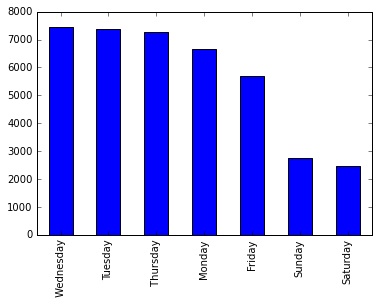

In [9]:
df['day_of_week'].value_counts().plot(kind='bar')


                                   url_name        date  \
0             amazon-instant-video-browser/  2013/01/07   
57                          reeddit-reddit/  2013/01/07   
56                       rage-comics-dying/  2013/01/07   
55     power-matters-alliance-organization/  2013/01/07   
54                 polaroid-android-camera/  2013/01/07   
...                                     ...         ...   
39626                  christmas-tree-bugs/  2014/12/27   
39625        als-ice-bucket-challenge-swim/  2014/12/27   
39624               air-asia-flight-qz8501/  2014/12/27   
39632                  las-vegas-new-years/  2014/12/27   
39643                youtube-channels-2015/  2014/12/27   

                                                     url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
57        http://mashable.com/2013/01/07/reeddit-reddit/       731.0   
56     http://mashable.com/2013/01/07/rage-comics-dying/       731.0   
55 

<AxesSubplot:>

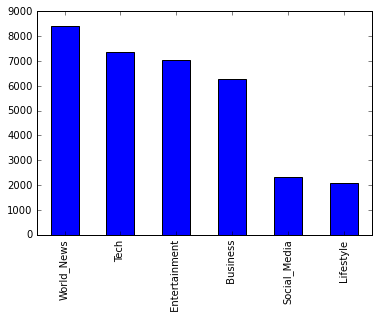

In [10]:
# categorical variables - new category to a single column
# Change the data type of the columns to 'object'
df[' data_channel_is_lifestyle']=df[' data_channel_is_lifestyle'].astype('category')
df[' data_channel_is_entertainment']=df[' data_channel_is_entertainment'].astype('category')
df[' data_channel_is_bus']=df[' data_channel_is_bus'].astype('category')
df[' data_channel_is_socmed']=df[' data_channel_is_socmed'].astype('category')
df[' data_channel_is_tech']=df[' data_channel_is_tech'].astype('category')
df[' data_channel_is_world']=df[' data_channel_is_world'].astype('category')

columns_to_convert_channel = [
    ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus',
    ' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world']

for column in columns_to_convert_channel:
    df[column] = df[column].astype('category')
    
# # Define a function to map values to day of the week
def map_to_day(row):
    if row[' data_channel_is_lifestyle'] == 1:
        return 'Lifestyle'
    elif row[' data_channel_is_entertainment'] == 1:
        return ' Entertainment'
    elif row[' data_channel_is_bus'] == 1:
        return ' Business'
    elif row[' data_channel_is_socmed'] == 1:
        return 'Social_Media'
    elif row[' data_channel_is_tech'] == 1:
        return 'Tech'
    elif row[' data_channel_is_world'] == 1:
        return 'World_News'
    else:
        return None
    return None  # Return None for rows with no day selected

# Apply the function to each row and create a new column 'day'
df['news_category'] = df.apply(map_to_day, axis=1)

df.head()

print(df)

print(df['news_category'].value_counts())

df['news_category'].value_counts().plot(kind='bar')


In [11]:
# df['date'].value_counts()
# # grouped = df.groupby('date')
# # df.head()
# df['year'].value_counts()
# #data goes from 2013-2014
# df['month'].value_counts()
df['day_of_week'].value_counts()
# grouped = df.groupby('day_of_week')
# df.head()

 Wednesday    7435
Tuesday       7390
 Thursday     7267
Monday        6661
Friday        5701
Sunday        2737
Saturday      2453
Name: day_of_week, dtype: int64

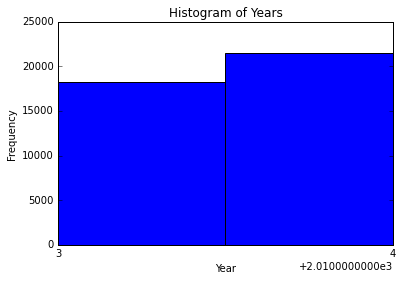

In [12]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a histogram based on the 'year' column
plt.hist(df['year'], bins=df['year'].nunique(), edgecolor='k')

# Set the x-axis labels to be the unique years
plt.xticks(np.arange(df['year'].min(), df['year'].max() + 1))

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Years')
plt.show()

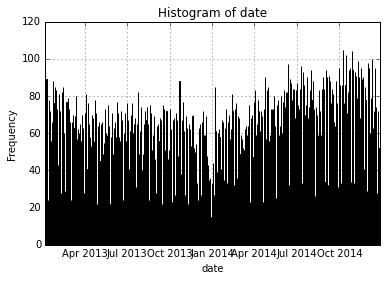

In [13]:
#take cateogrical variables and label encode them as 1 or 0 
#referencing https://www.kaggle.com/code/ozgurdogan646/water-quality-prediction-classification-regression in line 7
#use Bard for referencing and adapting different features 
# Identify the categorical variables
categorical_variables = ['date']

# Group the DataFrame by the categorical variables
for column in categorical_variables:
  grouped_df = df.groupby(column)

#   Create a histogram for each group
  plt.figure()
  grouped_df[column].hist()
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {column}')
  plt.show()



In [14]:
print(df.columns)

Index(['url_name', 'date', 'url', ' timedelta', ' n_tokens_title',
       ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
       ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjecti

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df['n_non_stop_words'], bins=2, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('n_non_stop_words')
plt.ylabel('Frequency')
plt.title('Frequency Histogram for n_non_stop_words')
plt.xticks([0, 1])  # Set the x-axis ticks to match the unique values (0 and 1)
plt.show()

KeyError: 'n_non_stop_words'

<Figure size 576x432 with 0 Axes>

In [ ]:
# Calculate the average of 'resultMeanValue' for each group
averages = GrDfClean['resultMeanValue'].mean().reset_index()